In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycaret
from pycaret.regression import * 
import numpy as np

In [342]:
df=pd.DataFrame(pd.read_excel("window_breakage_data.xlsx",engine='openpyxl'))

In [343]:
df.head(5)

,PF Rowstate,Batch,Breakage Rate,Yield,YldFrctn,YieldX,Pass/Fail,Window Size,Glass thickness,Ambient Temp,Cut speed,Edge Deletion rate,Spacer Distance,Window color,Window Type,Glass Supplier,Silicon Viscosity,Glass Supplier Location
0,1024.0,4011,6.207,93.793358,0.937934,1.216623,Pass,69.410127,0.5076,19.421091,1.520784,15.515228,3.299172,79.90,Vinyl,Supplier A,8.942454,Minnesota
1,1024.0,4015,2.884,97.110487,0.971105,1.329818,Pass,62.054341,0.5015,11.809967,2.606436,14.571468,5.597298,83.21,Vinyl,Supplier C,8.409810,Iowa
2,1024.0,4016,4.586,95.413742,0.954137,1.266765,Pass,56.379612,0.5091,23.466869,1.140074,15.409698,4.831903,92.09,Aluminum,Supplier D,10.338810,Wisconsin
3,1024.0,4017,1.823,98.120298,0.981203,1.376600,Pass,62.776805,0.5061,18.177280,1.868036,15.728905,4.719640,78.57,Wood,Supplier C,15.181158,Iowa
4,1024.0,4018,0.601,99.228920,0.992289,1.446533,Pass,NaN,0.5092,23.517670,0.614988,15.408881,5.638548,70.29,Vinyl,NaN,13.333607,NaN


In [344]:
df=df.drop(['Yield','YldFrctn','YieldX','Pass/Fail','PF Rowstate','Batch','Window Type','Glass Supplier','Glass Supplier Location'],axis=1)
#,'PF Rowstate','Batch','Silicon Viscosity','Glass Supplier Location','Ambient Temp'

In [345]:
df.head(5)

,Breakage Rate,Window Size,Glass thickness,Ambient Temp,Cut speed,Edge Deletion rate,Spacer Distance,Window color,Silicon Viscosity
0,6.207,69.410127,0.5076,19.421091,1.520784,15.515228,3.299172,79.90,8.942454
1,2.884,62.054341,0.5015,11.809967,2.606436,14.571468,5.597298,83.21,8.409810
2,4.586,56.379612,0.5091,23.466869,1.140074,15.409698,4.831903,92.09,10.338810
3,1.823,62.776805,0.5061,18.177280,1.868036,15.728905,4.719640,78.57,15.181158
4,0.601,NaN,0.5092,23.517670,0.614988,15.408881,5.638548,70.29,13.333607


In [346]:
df.describe()

,Breakage Rate,Window Size,Glass thickness,Ambient Temp,Cut speed,Edge Deletion rate,Spacer Distance,Window color,Silicon Viscosity
count,1301.000000,1213.000000,1301.000000,1270.000000,1249.000000,1236.000000,1285.000000,1301.000000,1277.000000
mean,6.276304,63.758223,0.502752,16.198353,1.872380,15.718308,4.258189,66.917994,12.036639
std,5.716120,7.158120,0.006113,4.572135,0.802577,1.177423,0.906067,18.309811,2.437012
min,0.004000,51.919507,0.479700,8.392694,0.296450,13.752582,2.690235,7.550000,7.805577
25%,2.547000,56.942267,0.498700,11.944914,1.227402,14.672490,3.491440,53.830000,9.875872
50%,4.460000,64.424635,0.502900,16.338422,1.901043,15.680710,4.285967,73.070000,12.031070
75%,8.193000,70.039760,0.507000,20.166265,2.536933,16.731976,5.033848,81.160000,14.114239
max,36.156000,75.568636,0.523100,24.098396,3.217969,17.747635,5.809628,98.050000,16.196003


In [347]:
print(df.columns)

Index(['Breakage Rate', 'Window Size', 'Glass thickness', 'Ambient Temp',
       'Cut speed', 'Edge Deletion rate', 'Spacer Distance', 'Window color',
       'Silicon Viscosity'],
      dtype='object')


In [414]:
hehe = setup(data = df, target = 'Breakage Rate', train_size=0.8,  normalize=True,transformation=True,transform_target=True)

,Description,Value
0,session_id,852
1,Target,Breakage Rate
2,Original Data,"(1301, 9)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1040, 8)"


In [415]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0076,7.1851,2.6613,0.7861,0.4666,2.0804,0.0950
rf,Random Forest Regressor,2.0664,7.6868,2.7518,0.7703,0.4729,1.9784,0.1470
lightgbm,Light Gradient Boosting Machine,2.0854,7.7878,2.7669,0.7701,0.4839,1.9422,0.0370
gbr,Gradient Boosting Regressor,2.0593,7.8852,2.7847,0.7650,0.4700,1.9496,0.0530
knn,K Neighbors Regressor,2.4406,11.4373,3.3600,0.6622,0.5165,1.9822,0.2880
huber,Huber Regressor,2.6547,12.9698,3.5871,0.6146,0.5580,2.5635,0.8110
dt,Decision Tree Regressor,2.7336,14.0268,3.7234,0.5858,0.6753,3.0444,0.0150
lar,Least Angle Regression,2.7158,14.2072,3.7538,0.5795,0.5534,2.3417,0.0150
lr,Linear Regression,2.7158,14.2072,3.7538,0.5795,0.5534,2.3417,0.0200
ridge,Ridge Regression,2.7163,14.2184,3.7553,0.5792,0.5533,2.3421,0.0100


In [416]:
hb=create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8343,17.4562,4.1781,0.6456,0.4771,9.0552
1,2.8144,13.3617,3.6554,0.5907,0.6610,2.2672
2,2.8720,13.5292,3.6782,0.4758,0.6272,2.9582
3,2.4085,10.1806,3.1907,0.6025,0.5331,0.9312
4,2.7341,14.5095,3.8091,0.5684,0.5584,1.2677
5,2.5288,12.9533,3.5991,0.6509,0.5617,1.2822
6,2.5588,10.2144,3.1960,0.7565,0.5495,3.3378
7,2.7475,14.8586,3.8547,0.5968,0.5653,1.7309
8,2.7555,12.9830,3.6032,0.5636,0.5779,2.0983
9,2.2931,9.6514,3.1067,0.6950,0.4690,0.7062


In [417]:
lightgbm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4167,11.1272,3.3357,0.7741,0.4856,6.0834
1,2.1296,8.0548,2.8381,0.7533,0.5511,1.4473
2,2.2303,8.2012,2.8638,0.6822,0.5032,2.1397
3,1.9333,6.4298,2.5357,0.7489,0.4526,0.7266
4,2.1937,10.8113,3.2881,0.6784,0.5264,1.0059
5,2.2936,9.4885,3.0803,0.7443,0.5272,1.1452
6,2.0661,7.2032,2.6839,0.8283,0.4756,3.4294
7,1.9693,5.9742,2.4442,0.8379,0.4482,0.9777
8,1.9145,5.6132,2.3692,0.8113,0.4692,1.8961
9,1.7065,4.9749,2.2305,0.8428,0.4003,0.5711


In [418]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3043,9.9627,3.1564,0.7977,0.4616,7.0417
1,2.1241,7.5450,2.7468,0.7689,0.5534,1.5969
2,2.1464,7.9627,2.8218,0.6915,0.4784,2.2152
3,1.9687,6.8094,2.6095,0.7341,0.4612,0.7079
4,2.0484,9.6209,3.1018,0.7138,0.4798,0.8831
5,1.9620,6.2996,2.5099,0.8302,0.4833,1.0303
6,2.1400,7.5123,2.7409,0.8209,0.4720,3.9356
7,1.8843,5.9428,2.4378,0.8387,0.4332,1.0339
8,1.9337,6.2084,2.4917,0.7913,0.4632,1.8379
9,1.5645,3.9872,1.9968,0.8740,0.3796,0.5209


In [419]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9943,20.2408,4.4990,0.5891,0.4860,8.1928
1,2.7577,13.6792,3.6985,0.5810,0.6420,2.0741
2,2.9379,14.4355,3.7994,0.4407,0.6224,2.6861
3,2.4885,11.1598,3.3406,0.5643,0.5348,0.8752
4,2.7239,15.1947,3.8980,0.5480,0.5493,1.1539
5,2.5990,14.3427,3.7872,0.6135,0.5505,1.1803
6,2.6744,11.6656,3.4155,0.7219,0.5445,3.0931
7,2.7877,16.2700,4.0336,0.5585,0.5587,1.5934
8,2.8310,14.2468,3.7745,0.5211,0.5797,1.9043
9,2.3636,10.8368,3.2919,0.6575,0.4659,0.6637


In [420]:
print(lr)

PowerTransformedTargetRegressor(copy_X=True, fit_intercept=True, n_jobs=-1,
                                normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=LinearRegression(copy_X=True,
                                                           fit_intercept=True,
                                                           n_jobs=-1,
                                                           normalize=False))


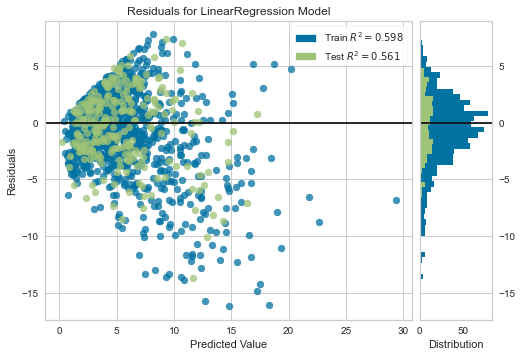

In [421]:
plot_model(lr)

In [422]:
beta=list(hb.coef_)

In [423]:
intercept=hb.intercept_

In [424]:
beta

[-0.16241545534532065,
 -0.5510296671819238,
 0.10237772023314337,
 0.09554223478018489,
 0.12391505162230919,
 0.016708106165087798,
 -0.059461025293347916,
 0.018578950617520813]

In [425]:
xtrain_cols = get_config('X_train').columns

In [426]:
col=list(xtrain_cols)

In [427]:
col

['Window Size',
 'Glass thickness',
 'Ambient Temp',
 'Cut speed',
 'Edge Deletion rate',
 'Spacer Distance',
 'Window color',
 'Silicon Viscosity']

In [428]:
j=0
coef={}
while j != len(beta):
    for i in col:
        coef[i]=beta[j]
        j=j+1

In [429]:
coef

{'Window Size': -0.16241545534532065,
 'Glass thickness': -0.5510296671819238,
 'Ambient Temp': 0.10237772023314337,
 'Cut speed': 0.09554223478018489,
 'Edge Deletion rate': 0.12391505162230919,
 'Spacer Distance': 0.016708106165087798,
 'Window color': -0.059461025293347916,
 'Silicon Viscosity': 0.018578950617520813}

In [433]:
from pyomo.environ import *
model = ConcreteModel()
        
model.A=Set(initialize=col)
lb={}
ub={}
for i in col:
    try:
        lb[i]=df[i].min()
    except:
        lb[i]=0
    try:
        ub[i]=df[i].max()
    except:
        ub[i]=1
def fb(model, i):
    return (lb[i], ub[i])

model.window= Var(model.A, domain=NonNegativeReals, bounds=fb)

#model.weight = Constraint(expr = sum(coef[i] * model.window[i] for i in col ) + intercept  >=0)

# Model Objective
model.objective = Objective(expr=sum(coef[i] * model.window[i] for i in col ) + intercept , sense=minimize)

# Solve the model
opt = SolverFactory('cplex')
results = opt.solve(model)

In [434]:
for i in col:
    print(coef[i] , model.window[i])

-0.16241545534532065 window[Window Size]
-0.5510296671819238 window[Glass thickness]
0.10237772023314337 window[Ambient Temp]
0.09554223478018489 window[Cut speed]
0.12391505162230919 window[Edge Deletion rate]
0.016708106165087798 window[Spacer Distance]
-0.059461025293347916 window[Window color]
0.018578950617520813 window[Silicon Viscosity]


In [435]:
print("Print values for all variables")
ans=[]
for v in model.component_data_objects(Var):
    print (str(v), v.value)
    ans.append(v.value)
model.display()

Print values for all variables
window[Window Size] 75.5686360445619
window[Glass thickness] 0.5231
window[Ambient Temp] 8.3926943748109
window[Cut speed] 0.29644984149560294
window[Edge Deletion rate] 13.7525820685551
window[Spacer Distance] 2.69023543648422
window[Window color] 98.05
window[Silicon Viscosity] 7.80557684451342
Model unknown

  Variables:
    window : Size=8, Index=A
        Key                : Lower             : Value               : Upper            : Fixed : Stale : Domain
              Ambient Temp :   8.3926943748109 :     8.3926943748109 : 24.0983957314007 : False : False : NonNegativeReals
                 Cut speed : 0.296449841495603 : 0.29644984149560294 :  3.2179686505273 : False : False : NonNegativeReals
        Edge Deletion rate :  13.7525820685551 :    13.7525820685551 : 17.7476352276281 : False : False : NonNegativeReals
           Glass thickness :            0.4797 :              0.5231 :           0.5231 : False : False : NonNegativeReals
         

In [436]:
df_empty = df[0:0]
df_empty=df_empty.drop(['Breakage Rate'],axis=1)

In [437]:
df2 = pd.DataFrame([ans], columns=col)
pd.concat([df2, df_empty])

,Window Size,Glass thickness,Ambient Temp,Cut speed,Edge Deletion rate,Spacer Distance,Window color,Silicon Viscosity
0,75.568636,0.5231,8.392694,0.29645,13.752582,2.690235,98.05,7.805577


In [438]:
predict_model(et, data = df2)

,Window Size,Glass thickness,Ambient Temp,Cut speed,Edge Deletion rate,Spacer Distance,Window color,Silicon Viscosity,Label
0,75.568636,0.5231,8.392694,0.29645,13.752582,2.690235,98.05,7.805577,1.224172


In [439]:
predict_model(lr, data = df2)

,Window Size,Glass thickness,Ambient Temp,Cut speed,Edge Deletion rate,Spacer Distance,Window color,Silicon Viscosity,Label
0,75.568636,0.5231,8.392694,0.29645,13.752582,2.690235,98.05,7.805577,0.011603


In [440]:
predict_model(hb, data = df2)

,Window Size,Glass thickness,Ambient Temp,Cut speed,Edge Deletion rate,Spacer Distance,Window color,Silicon Viscosity,Label
0,75.568636,0.5231,8.392694,0.29645,13.752582,2.690235,98.05,7.805577,0.015766


In [441]:
predict_model(lightgbm, data = df2)

,Window Size,Glass thickness,Ambient Temp,Cut speed,Edge Deletion rate,Spacer Distance,Window color,Silicon Viscosity,Label
0,75.568636,0.5231,8.392694,0.29645,13.752582,2.690235,98.05,7.805577,1.660644


### Pyomo

In [52]:
from pyomo.environ import *
# create model
model = ConcreteModel()

# create variables
model.Batch = Var(domain=NonNegativeReals)
model.Window_Size = Var(domain=NonNegativeReals)
model.Glass_thickness = Var(domain=NonNegativeReals)
model.Ambient_Temp = Var(domain=NonNegativeReals)
model.Cut_speed = Var(domain=NonNegativeReals)
model.Edge_Deletion_rate = Var(domain=NonNegativeReals)
model.Spacer_Distance = Var(domain=NonNegativeReals)
model.Window_color = Var(domain=NonNegativeReals)
model.Silicon_Viscosity = Var(domain=NonNegativeReals)
model.Window_Type_Aluminum = Var(domain=Binary)
model.Window_Type_Vinyl = Var(domain=Binary)
model.Window_Type_Wood = Var(domain=Binary)
model.Window_Type_not_available = Var(domain=Binary)
model.Glass_Supplier_Supplier_A = Var(domain=Binary)
model.Glass_Supplier_Supplier_B = Var(domain=Binary)
model.Glass_Supplier_not_available = Var(domain=Binary)
model.Glass_Supplier_Location_Iowa = Var(domain=Binary)
model.Glass_Supplier_Location_Wisconsin = Var(domain=Binary)
model.Glass_Supplier_Location_not_available = Var(domain=Binary)

#Constraints
#MAX
model.Batch1 = Constraint(expr =model.Batch <= df['Batch'].max())
model.Window_Size1 = Constraint(expr =model.Window_Size <= df['Window Size'].max())
model.Glass_thickness1 = Constraint(expr =model.Glass_thickness <= df['Glass thickness'].max())
model.Ambient_Temp1 = Constraint(expr =model.Ambient_Temp <= df['Ambient Temp'].max())
model.Cut_speed1 = Constraint(expr =model.Cut_speed <= df['Cut speed'].max())
model.Edge_Deletion_rate1 = Constraint(expr =model.Edge_Deletion_rate <= df['Edge Deletion rate'].max())
model.Spacer_Distance1 = Constraint(expr =model.Spacer_Distance <= df['Spacer Distance'].max())
model.Window_color1 = Constraint(expr =model.Window_color <= df['Window color'].max())
model.Silicon_Viscosity1 = Constraint(expr =model.Silicon_Viscosity <= df['Silicon Viscosity'].max())

#min
model.Batch2 = Constraint(expr =model.Batch >= df['Batch'].min())
model.Window_Size2 = Constraint(expr =model.Window_Size >= df['Window Size'].min())
model.Glass_thickness2 = Constraint(expr =model.Glass_thickness >= df['Glass thickness'].min())
model.Ambient_Temp2 = Constraint(expr =model.Ambient_Temp >= df['Ambient Temp'].min())
model.Cut_speed2 = Constraint(expr =model.Cut_speed >= df['Cut speed'].min())
model.Edge_Deletion_rate2 = Constraint(expr =model.Edge_Deletion_rate >= df['Edge Deletion rate'].min())
model.Spacer_Distance2 = Constraint(expr =model.Spacer_Distance >= df['Spacer Distance'].min())
model.Window_color2 = Constraint(expr =model.Window_color >= df['Window color'].min())
model.Silicon_Viscosity2 = Constraint(expr =model.Silicon_Viscosity >= df['Silicon Viscosity'].min())



# declare objective
model.breakage = Objective(expr=6.4053593+(0.0012847235*model.Batch)+(-5.639321*model.YldFrctn)+(-0.14286977*model.YieldX)+ \
                           (0.002010107*model.Window_Size)+(0.0020115376*model.Glass_thickness)+ \
                           (0.00036257505*model.Ambient_Temp)+(0.0006182194*model.Cut_speed)+ \
                           (0.00186041*model.Edge_Deletion_rate)+(0.00019425154*model.Spacer_Distance)+ \
                           (0.0007132888*model.Window_color)+(-0.0010710359*model.Silicon_Viscosity)+ \
                           (0.03984295*model.Pass_Fail_Pass)+ \
                           (-0.46249214*model.Pass_Fail_not_available)+(-0.0012181252*model.Window_Type_Aluminum)+ \
                           (0.0029790998*model.Window_Type_Vinyl)+(-0.0013784468*model.Window_Type_Wood)+ \
                           (-0.00038375705*model.Window_Type_not_available)+(0.25698024*model.Glass_Supplier_Supplier_A)+ \
                           (0.05178359*model.Glass_Supplier_Supplier_B )+(0.05066681*model.Glass_Supplier_not_available)+ \
                           (0.0509817*model.Glass_Supplier_Location_Iowa)+ \
                           (0.0520823*model.Glass_Supplier_Location_Wisconsin)+ \
                           (-0.20551252*model.Glass_Supplier_Location_not_available), sense = minimize)

model.lowerbound=Constraint(expr =6.4053593+(0.0012847235*model.Batch)+(-5.639321*model.YldFrctn)+(-0.14286977*model.YieldX)+ \
                           (0.002010107*model.Window_Size)+(0.0020115376*model.Glass_thickness)+ \
                           (0.00036257505*model.Ambient_Temp)+(0.0006182194*model.Cut_speed)+ \
                           (0.00186041*model.Edge_Deletion_rate)+(0.00019425154*model.Spacer_Distance)+ \
                           (0.0007132888*model.Window_color)+(-0.0010710359*model.Silicon_Viscosity)+ \
                           (0.03984295*model.Pass_Fail_Pass)+ \
                           (-0.46249214*model.Pass_Fail_not_available)+(-0.0012181252*model.Window_Type_Aluminum)+ \
                           (0.0029790998*model.Window_Type_Vinyl)+(-0.0013784468*model.Window_Type_Wood)+ \
                           (-0.00038375705*model.Window_Type_not_available)+(0.25698024*model.Glass_Supplier_Supplier_A)+ \
                           (0.05178359*model.Glass_Supplier_Supplier_B )+(0.05066681*model.Glass_Supplier_not_available)+ \
                           (0.0509817*model.Glass_Supplier_Location_Iowa)+ \
                           (0.0520823*model.Glass_Supplier_Location_Wisconsin)+ \
                           (-0.20551252*model.Glass_Supplier_Location_not_available)>=0)

# solve
opt = SolverFactory('cplex')
results = opt.solve(model)

AttributeError: 'ConcreteModel' object has no attribute 'YldFrctn'